# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [345]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer

from tqdm import tqdm
state = 112263

In [346]:
try:
    data_train = pd.read_csv('gold_recovery_train_new.csv')
    data_test = pd.read_csv('gold_recovery_test_new.csv')
    data_full = pd.read_csv('gold_recovery_full_new.csv')
except:
    data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
    data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
    data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')

In [347]:
data_train.shape, data_test.shape, data_full.shape

((14149, 87), (5290, 53), (19439, 87))

In [348]:
# Функция просмотра инфо данных

def data_info(df):
    col_list = df.columns
    print('кол-во дупликатов:', df.duplicated().sum())
    for col in col_list:
        
        print('-' * 25)
        print(col, ': кол-во NaN', df[col].isna().sum(), ', процент NaN',
              round(df[col].isna().sum() / len(df) * 100, 2), '%')
    print('==' * 25)
    print()
    print()
    display(df.info())
    display(df.describe())
    display(df.head())

In [349]:
data_info(data_train)

кол-во дупликатов: 0
-------------------------
date : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
final.output.concentrate_ag : кол-во NaN 1 , процент NaN 0.01 %
-------------------------
final.output.concentrate_pb : кол-во NaN 1 , процент NaN 0.01 %
-------------------------
final.output.concentrate_sol : кол-во NaN 211 , процент NaN 1.49 %
-------------------------
final.output.concentrate_au : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
final.output.recovery : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
final.output.tail_ag : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
final.output.tail_pb : кол-во NaN 100 , процент NaN 0.71 %
-------------------------
final.output.tail_sol : кол-во NaN 5 , процент NaN 0.04 %
-------------------------
final.output.tail_au : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
primary_cleaner.input.sulfate : кол-во NaN 20 , процент NaN 0.14 %
-------------------------
primary_cleaner.

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [350]:
data_info(data_test)

кол-во дупликатов: 0
-------------------------
date : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
primary_cleaner.input.sulfate : кол-во NaN 4 , процент NaN 0.08 %
-------------------------
primary_cleaner.input.depressant : кол-во NaN 5 , процент NaN 0.09 %
-------------------------
primary_cleaner.input.feed_size : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
primary_cleaner.input.xanthate : кол-во NaN 4 , процент NaN 0.08 %
-------------------------
primary_cleaner.state.floatbank8_a_air : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
primary_cleaner.state.floatbank8_a_level : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
primary_cleaner.state.floatbank8_b_air : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
primary_cleaner.state.floatbank8_b_level : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
primary_cleaner.state.floatbank8_c_air : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
primary_cl

None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [351]:
data_info(data_full)

кол-во дупликатов: 0
-------------------------
date : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
final.output.concentrate_ag : кол-во NaN 1 , процент NaN 0.01 %
-------------------------
final.output.concentrate_pb : кол-во NaN 1 , процент NaN 0.01 %
-------------------------
final.output.concentrate_sol : кол-во NaN 211 , процент NaN 1.09 %
-------------------------
final.output.concentrate_au : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
final.output.recovery : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
final.output.tail_ag : кол-во NaN 1 , процент NaN 0.01 %
-------------------------
final.output.tail_pb : кол-во NaN 101 , процент NaN 0.52 %
-------------------------
final.output.tail_sol : кол-во NaN 6 , процент NaN 0.03 %
-------------------------
final.output.tail_au : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
primary_cleaner.input.sulfate : кол-во NaN 24 , процент NaN 0.12 %
-------------------------
primary_cleaner

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### Проверим, что эффективность обогащения рассчитана правильно

- Рассчитаем MAE на обучающей выборке для признака rougher.output.recovery  
- Рассчитаем MAE между расчётами и значением признака  

In [352]:
# Рассчет recovery

data_train['recovery'] = (data_train['rougher.output.concentrate_au']*(data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au']))/(data_train['rougher.input.feed_au']*(data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au']))*100

In [353]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,recovery
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794


In [354]:
#  Рассчет МАЕ

print(f'МАЕ_recovery: {(data_train["rougher.output.recovery"] - data_train["recovery"]).sum() / data_train.shape[0]}')

МАЕ_recovery: 1.3885438295121047e-16


Значение МАЕ близко к 0, что означает, что эффективность обогащения рассчитана верно

### Проанализируем признаки, недоступные в тестовой выборке

In [355]:
# Подготовка копии data_train

train_nottest = data_train.copy()

In [356]:
# Исключаем из неё поля data_test

train_nottest = train_nottest.drop(columns=list(data_test.columns))

In [357]:
display(train_nottest.head())
display(train_nottest.info())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,...,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,recovery
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,8.547551,...,87.107763,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185,87.107763
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,8.558743,...,86.843261,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248,86.843261
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,8.603505,...,86.842308,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187,86.842308
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,7.221879,...,87.226430,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062,87.226430
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,9.089428,...,86.688794,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448,86.688794


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


None

Исходя из описания технологического процесса, можно понять, что перед нами количесвтенные данные параметров веществ на разных этапах очистки

### Обработка NaN

In [358]:
# % пропусков в данных
pd.DataFrame(round(data_full.isna().mean() * 100, 2),
             columns=['Пропуски, %']).style.background_gradient('coolwarm')

,"Пропуски, %"
date,0.000000
final.output.concentrate_ag,0.010000
final.output.concentrate_pb,0.010000
final.output.concentrate_sol,1.090000
final.output.concentrate_au,0.000000
final.output.recovery,0.000000
final.output.tail_ag,0.010000
final.output.tail_pb,0.520000
final.output.tail_sol,0.030000
final.output.tail_au,0.000000


Согласно описанию проекта: "Соседние по времени параметры часто похожи", можно заполнить пропуски соседними значениями 

In [359]:
# Используем KNNImputer

imputer = KNNImputer()
no_nan = pd.DataFrame(data=imputer.fit_transform(
    data_train.drop(['date'], axis=1)), columns=data_train.drop(['date'], axis=1).columns, index=data_train.index)

In [360]:
data_test = data_test.dropna(subset= ['date'],axis = 0)

In [361]:
# Добавляем недостающие данные в data_test для дальнейшего создания выборки

data_test_for_target = data_test.merge(
    data_full.
    loc[:, ['date', "rougher.output.recovery", "final.output.recovery"]],
    on='date')

In [362]:
data_test_for_target = data_test_for_target.dropna(subset=["rougher.output.recovery","final.output.recovery"],axis = 0)

In [363]:
data_test = data_test_for_target.loc[:, data_test.columns]

In [364]:
target_test_rougher = data_test_for_target["rougher.output.recovery"]
target_test_final = data_test_for_target["final.output.recovery"]

In [365]:
data_test = data_test.drop("date", axis=1)

In [366]:
imputer_test = KNNImputer()
test_no_nan = pd.DataFrame(data=imputer_test.fit_transform(data_test),
                           columns=data_test.columns,
                           index=data_test.index)

In [367]:
col_list = ['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb', 'rougher.input.feed_sol', \
           'rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol',\
           'primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_sol',\
           'final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol']

In [368]:
col_list

['rougher.input.feed_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol']

In [369]:
for col in col_list:
    no_nan = no_nan.drop(index=no_nan[no_nan[col] < 1].index, axis=0)

In [370]:
data_test = data_test.drop(index=data_test[data_test["rougher.input.feed_au"] < 1].index, axis=0)
data_test = data_test.drop(index=data_test[data_test["rougher.input.feed_ag"] < 1].index, axis=0)
data_test = data_test.drop(index=data_test[data_test["rougher.input.feed_pb"] < 1].index, axis=0)
data_test = data_test.drop(index=data_test[data_test["rougher.input.feed_sol"] < 1].index, axis=0)

In [371]:
train_features_rougher = no_nan.loc[:, data_test.columns]
train_target_rougher = no_nan['rougher.output.recovery']

train_features_final = train_features_rougher
train_target_final = no_nan['final.output.recovery']

Проведена проверка на дубликаты - их обнаружено не было, удалены записи с пропусками

Для проверки качества оценки моедли столбцы `['rougher.output.recovery', 'final.output.recovery']` добавили в тестовые данные для создания выборки target_test.

## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [372]:
print('Концентрация в черномов сырье')
print('Концентрация Золота (Au):{: 0.2f}, Серебра (Ag):{: 0.2f}, Свинца (Pb): {: 0.2f}'
    .format(no_nan["rougher.input.feed_au"].mean(),
            no_nan["rougher.input.feed_ag"].mean(),
            no_nan["rougher.input.feed_pb"].mean()))
print()

print('Черновая концентрация после флотации')
print('Концентрация Золота (Au):{: 0.2f}, Серебра (Ag):{: 0.2f}, Свинца (Pb): {: 0.2f}'
    .format(no_nan["rougher.output.concentrate_au"].mean(),
            no_nan['rougher.output.concentrate_ag'].mean(),
            no_nan['rougher.output.concentrate_pb'].mean()))
print()

print('Концентрация после первичной очистки')
print('Концентрация Золота (Au):{: 0.2f}, Серебра (Ag):{: 0.2f}, Свинца (Pb): {: 0.2f}'
    .format(no_nan['primary_cleaner.output.concentrate_au'].mean(),
            no_nan['primary_cleaner.output.concentrate_ag'].mean(),
            no_nan['primary_cleaner.output.concentrate_pb'].mean()))
print()

print('Финальная концентрация')
print('Концентрация Золота (Au):{: 0.2f}, Серебра (Ag):{: 0.2f}, Свинца (Pb): {: 0.2f}'
    .format(no_nan['final.output.concentrate_au'].mean(),
            no_nan['final.output.concentrate_ag'].mean(),
            no_nan['final.output.concentrate_pb'].mean()))

Концентрация в черномов сырье
Концентрация Золота (Au): 7.91, Серебра (Ag): 8.59, Свинца (Pb):  3.54

Черновая концентрация после флотации
Концентрация Золота (Au): 19.90, Серебра (Ag): 12.01, Свинца (Pb):  7.86

Концентрация после первичной очистки
Концентрация Золота (Au): 32.86, Серебра (Ag): 8.34, Свинца (Pb):  9.75

Финальная концентрация
Концентрация Золота (Au): 44.23, Серебра (Ag): 5.16, Свинца (Pb):  10.21


Концентрация Золота (Au)

In [373]:
# Концентрация Золота (Au)

print('Концентрация металла в сырье')
print(data_full[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].mean())
print('=='*25)
print('Концентрация металла в хвостах')
print(data_full[['rougher.output.tail_ag', 'primary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_ag']].mean())

Концентрация металла в сырье
rougher.output.concentrate_au            19.772000
primary_cleaner.output.concentrate_ag     8.442408
final.output.concentrate_ag               5.168470
dtype: float64
Концентрация металла в хвостах
rougher.output.tail_ag               5.588982
primary_cleaner.output.tail_ag      16.145826
secondary_cleaner.output.tail_ag    14.586833
dtype: float64


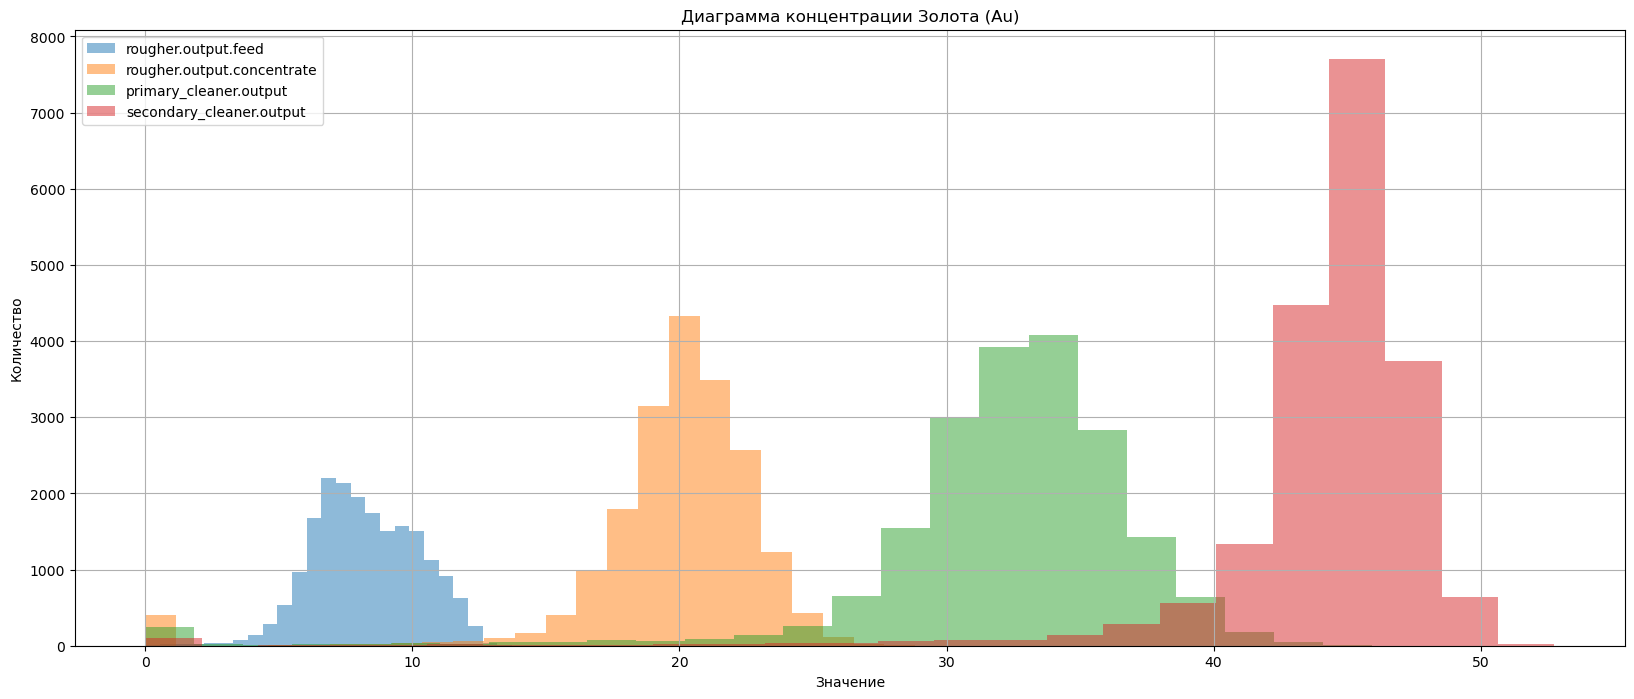

In [374]:
plt.figure(figsize=(20, 8))

data_full['rougher.input.feed_au'].hist(bins=25, label='rougher.output.feed', alpha=0.5)
data_full['rougher.output.concentrate_au'].hist(bins=25, label='rougher.output.concentrate', alpha=0.5)
data_full['primary_cleaner.output.concentrate_au'].hist(bins=25, label='primary_cleaner.output', alpha=0.5)
data_full['final.output.concentrate_au'].hist(bins=25, label='secondary_cleaner.output', alpha=0.5)

plt.title('Диаграмма концентрации Золота (Au)')
plt.legend()
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

Концентрация Серебра (Ag)

In [375]:
# Концентрация Серебра (Ag)

print('Концентрация металла в сырье')
print(data_full[['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].mean())
print('=='*25)
print('Концентрация металла в хвостах')
print(data_full[['rougher.output.tail_ag', 'primary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_ag']].mean())

Концентрация металла в сырье
rougher.output.concentrate_ag            11.994759
primary_cleaner.output.concentrate_ag     8.442408
final.output.concentrate_ag               5.168470
dtype: float64
Концентрация металла в хвостах
rougher.output.tail_ag               5.588982
primary_cleaner.output.tail_ag      16.145826
secondary_cleaner.output.tail_ag    14.586833
dtype: float64


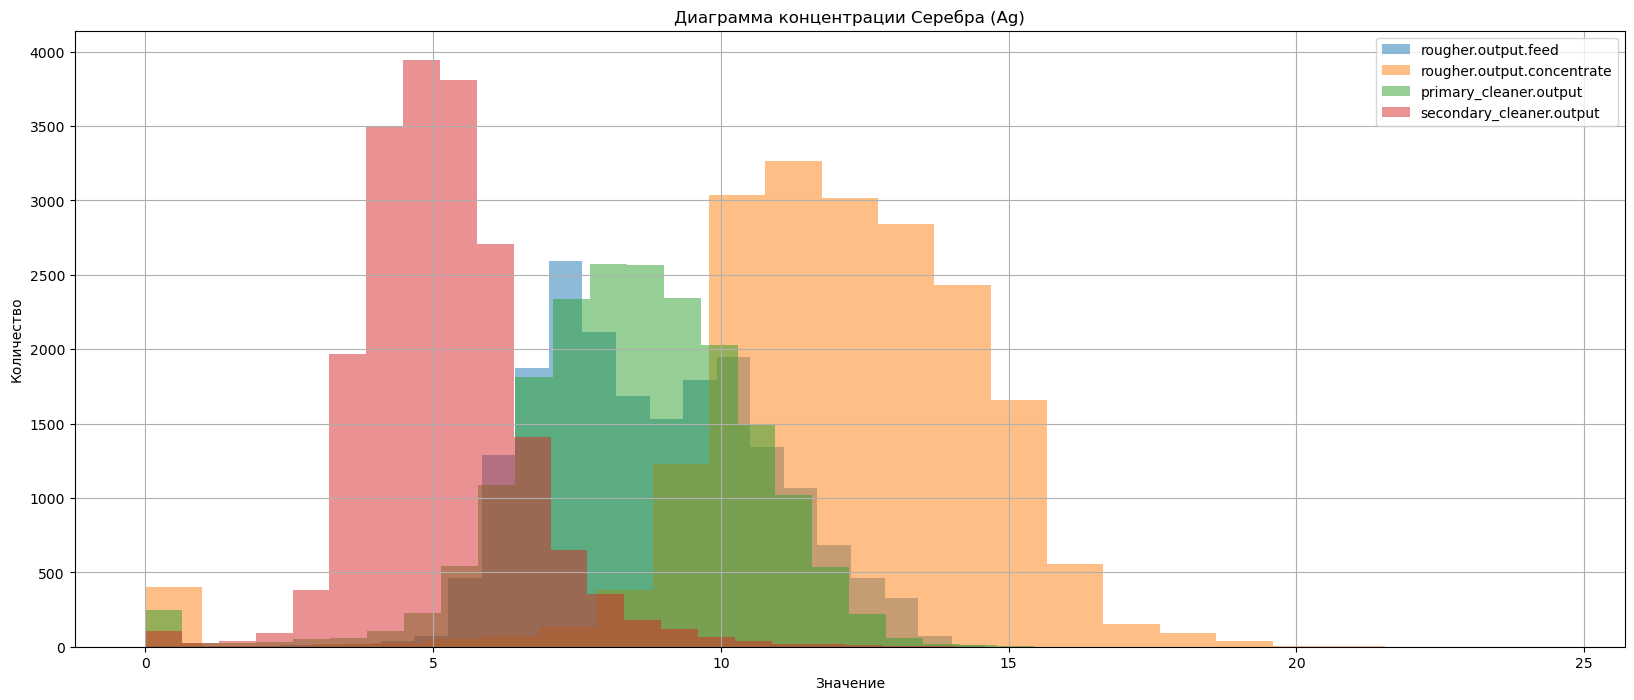

In [376]:
plt.figure(figsize=(20, 8))

data_full['rougher.input.feed_ag'].hist(bins=25, label='rougher.output.feed', alpha=0.5)
data_full['rougher.output.concentrate_ag'].hist(bins=25, label='rougher.output.concentrate', alpha=0.5)
data_full['primary_cleaner.output.concentrate_ag'].hist(bins=25, label='primary_cleaner.output', alpha=0.5)
data_full['final.output.concentrate_ag'].hist(bins=25, label='secondary_cleaner.output', alpha=0.5)

plt.title('Диаграмма концентрации Серебра (Ag)')
plt.legend()
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

Концентрация Свинца (Pb)

In [377]:
# Концентрация Свинца (Pb)

print('Концентрация металла в сырье')
print(data_full[['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].mean())
print('=='*25)
print('Концентрация металла в хвостах')
print(data_full[['rougher.output.tail_pb', 'primary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_pb']].mean())

Концентрация металла в сырье
rougher.output.concentrate_pb            7.606272
primary_cleaner.output.concentrate_pb    9.829530
final.output.concentrate_pb              9.978895
dtype: float64
Концентрация металла в хвостах
rougher.output.tail_pb              0.645782
primary_cleaner.output.tail_pb      3.435656
secondary_cleaner.output.tail_pb    5.777703
dtype: float64


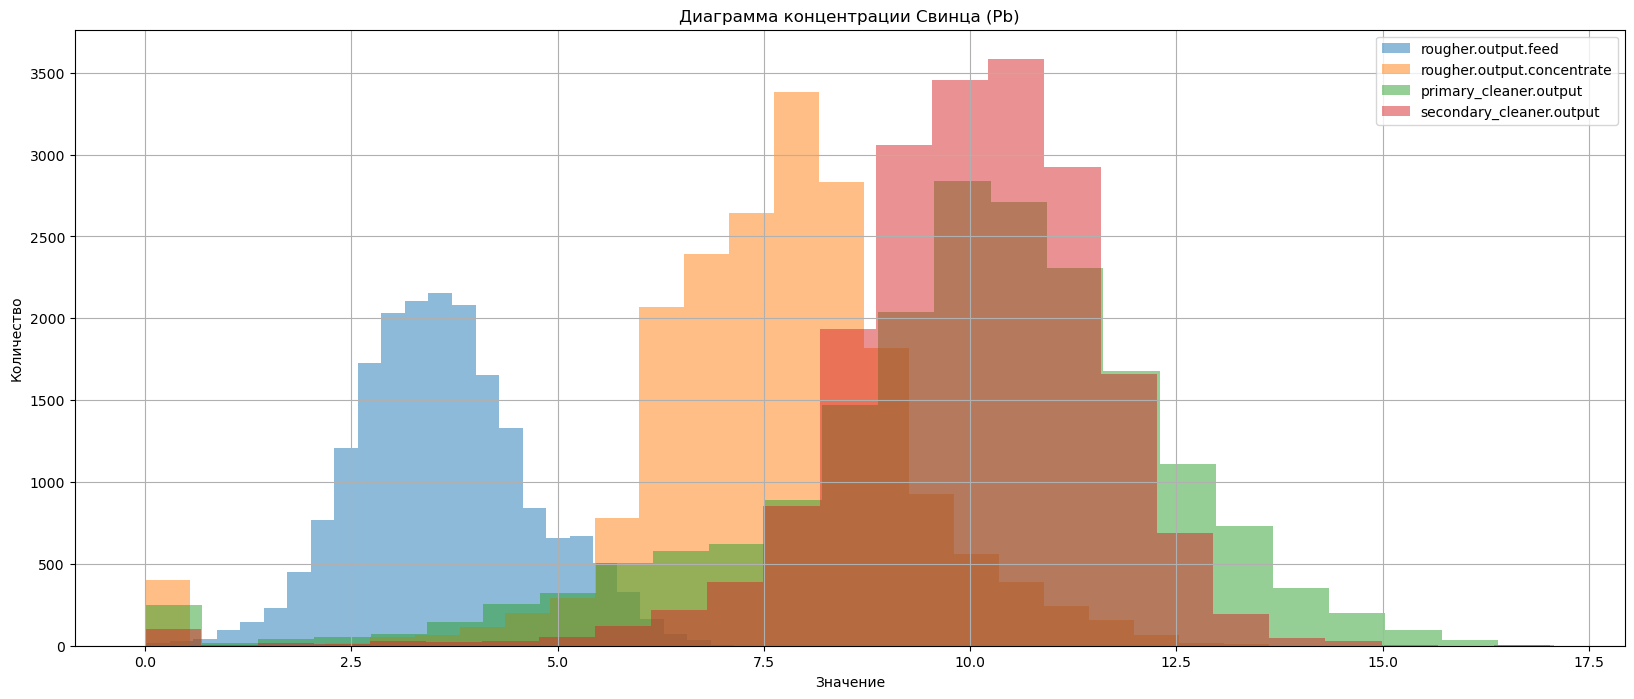

In [378]:
plt.figure(figsize=(20, 8))

data_full['rougher.input.feed_pb'].hist(bins=25,label='rougher.output.feed', alpha=0.5)
data_full['rougher.output.concentrate_pb'].hist(bins=25, label='rougher.output.concentrate', alpha=0.5)
data_full['primary_cleaner.output.concentrate_pb'].hist(bins=25, label='primary_cleaner.output', alpha=0.5)
data_full['final.output.concentrate_pb'].hist(bins=25,label='secondary_cleaner.output', alpha=0.5)

plt.title('Диаграмма концентрации Свинца (Pb)')
plt.legend()
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

Концентрация золота значительно увеличивается на каждом этапе обработки, но с ним растет и концентрация свинца

### Распределения размеров гранул сырья

In [379]:
print(data_train['rougher.input.feed_size'].describe())
print()
print(data_test['rougher.input.feed_size'].describe())

count    14005.000000
mean        60.110518
std         22.418485
min          9.659576
25%         48.973027
50%         55.373885
75%         66.080172
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    5275.000000
mean       55.939439
std        19.074046
min         0.046369
25%        43.902358
50%        50.852657
75%        62.391878
max       392.494040
Name: rougher.input.feed_size, dtype: float64


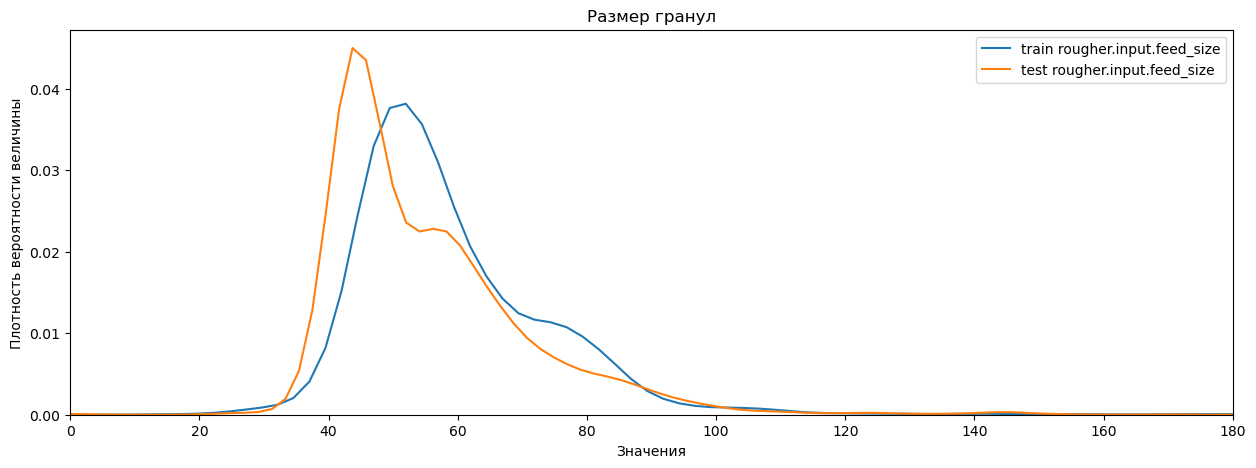

In [380]:
# Концентрация размера сырья на входе флотации train и test

plt.figure(figsize=(15, 5))

sns.kdeplot(data_train['rougher.input.feed_size'], label='train rougher.input.feed_size')
sns.kdeplot(data_test['rougher.input.feed_size'], label='test rougher.input.feed_size')

plt.title('Размер гранул')
plt.legend()
plt.xlim([0, 180])
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности величины')
plt.show()

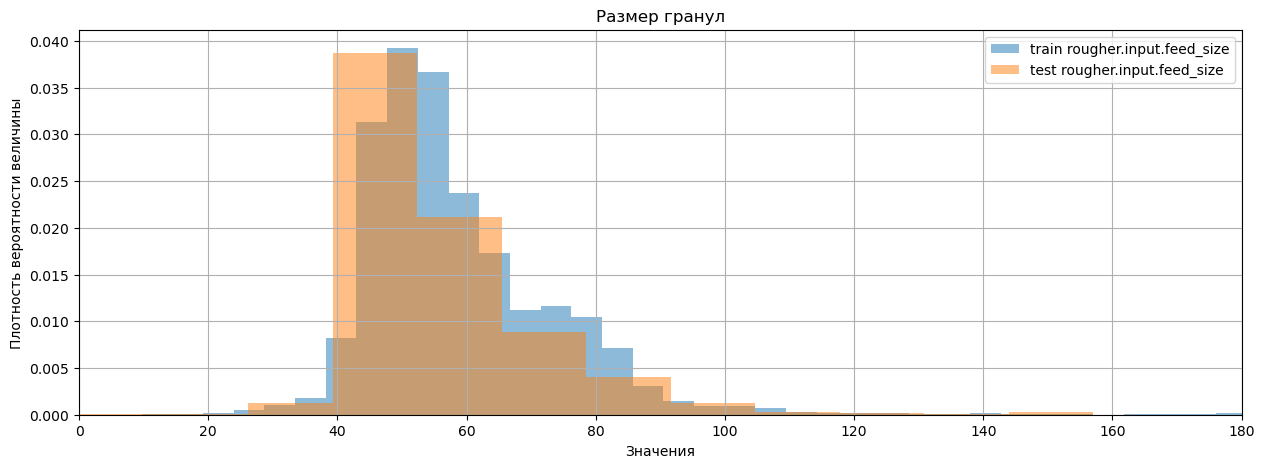

In [381]:
# Распределение размера сырья на входе флотации train и test

plt.figure(figsize=(15, 5))

data_train['rougher.input.feed_size'].hist(bins=100, label='train rougher.input.feed_size', density=True, alpha=0.5)
data_test['rougher.input.feed_size'].hist(bins=30, label='test rougher.input.feed_size', density=True, alpha=0.5)

plt.title('Размер гранул')
plt.legend()
plt.xlim([0, 180])
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности величины')
plt.show()

Построены графики распределения плотности вероятности размеров гранул выборок train и test

Плотность распределения выглядит нормальным. Однако на этом этапе просмотра данных говорить о верной оценки модели рано, далее нам предстоит взглянуть на концентрации веществ на разных этапах, где как раз и могу поджидать нас подводные камни

### Суммарная концентрация всех веществ на разных стадиях

In [382]:
# Сумма концентраций в сырье

data_full['rougher.input.feed_summary'] = (
    data_full['rougher.input.feed_au'] +
    data_full['rougher.input.feed_ag'] +
    data_full['rougher.input.feed_pb'] +
    data_full['rougher.input.feed_sol'])

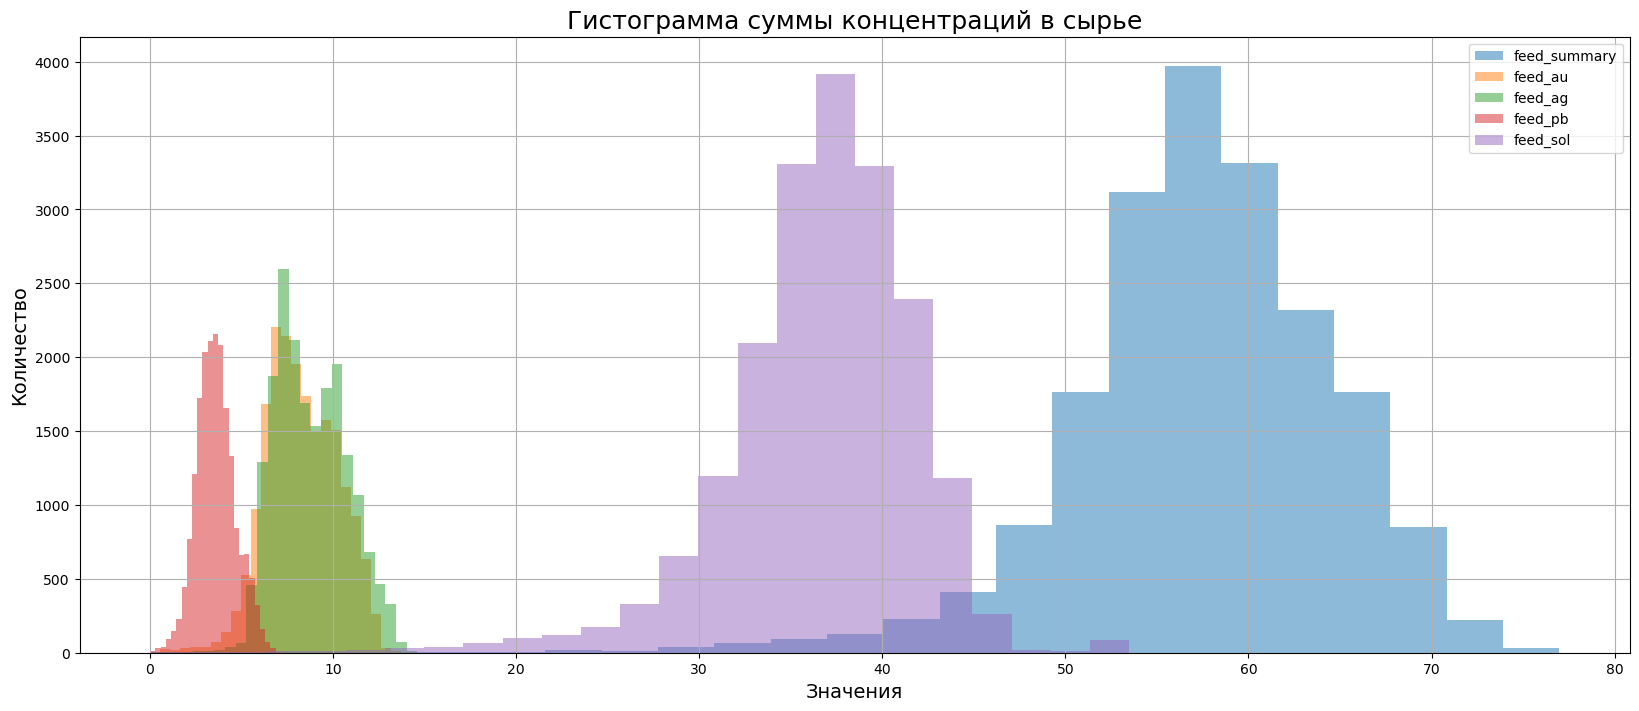

In [383]:
# Распределение суммы концентраций в сырье

plt.figure(figsize=(20, 8))

data_full['rougher.input.feed_summary'].hist(bins=25, label='feed_summary', alpha=0.5)
data_full['rougher.input.feed_au'].hist(bins=25, label='feed_au', alpha=0.5)
data_full['rougher.input.feed_ag'].hist(bins=25, label='feed_ag', alpha=0.5)
data_full['rougher.input.feed_pb'].hist(bins=25, label='feed_pb', alpha=0.5)
data_full['rougher.input.feed_sol'].hist(bins=25, label='feed_sol', alpha=0.5)

plt.title('Гистограмма суммы концентраций в сырье', fontsize=18)
plt.legend()
plt.xlabel('Значения', fontsize=14)
plt.ylabel('Количество', fontsize=14)

plt.show()

In [384]:
# Сумма черновой концентрации

data_full['rougher.output.concentrate_summary'] = (
    data_full['rougher.output.concentrate_au'] +
    data_full['rougher.output.concentrate_ag'] +
    data_full['rougher.output.concentrate_pb'] +
    data_full['rougher.output.concentrate_sol'])

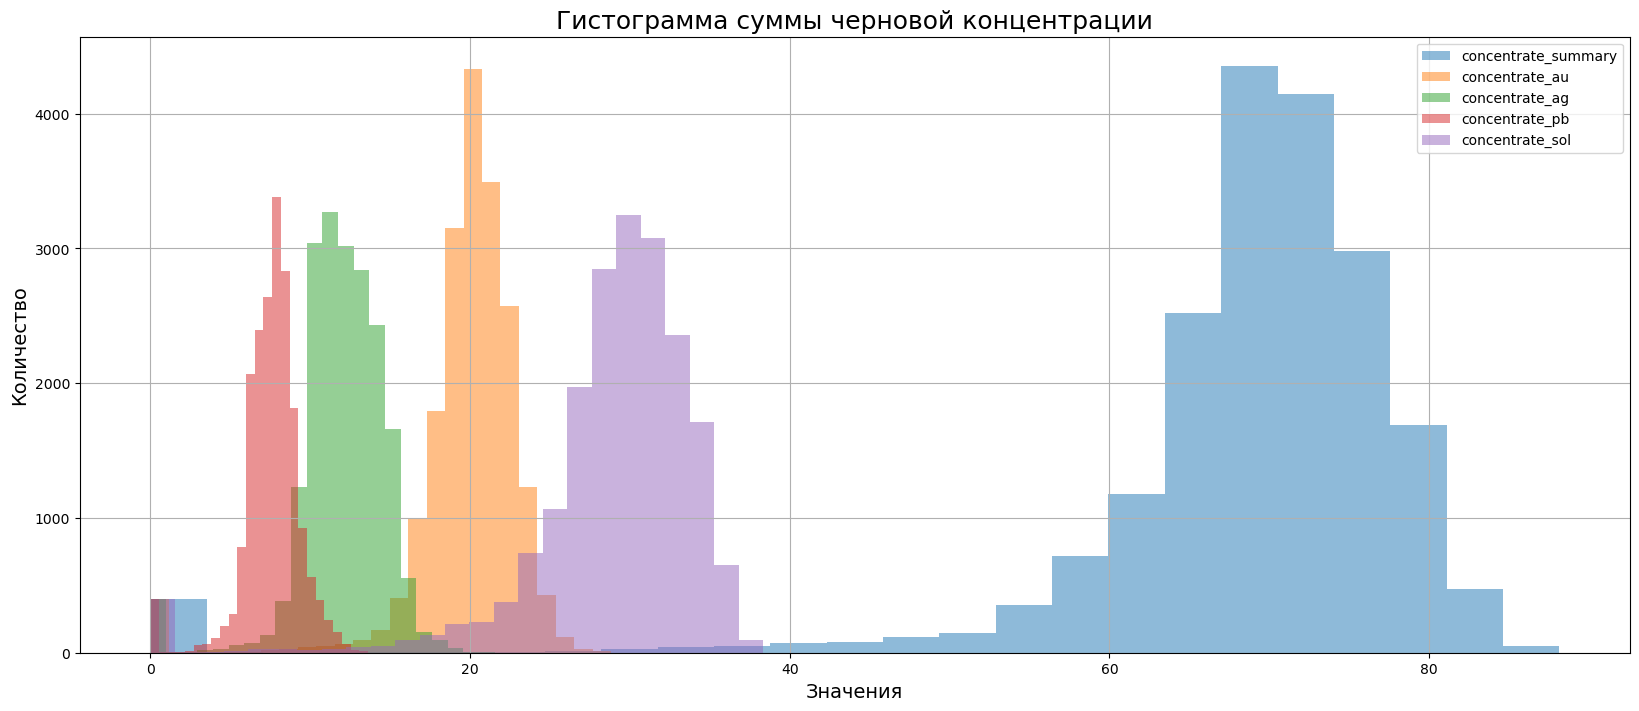

In [385]:
# Распределение суммы черновой концентраций

plt.figure(figsize=(20, 8))

data_full['rougher.output.concentrate_summary'].hist(bins=25, label='concentrate_summary', alpha=0.5)
data_full['rougher.output.concentrate_au'].hist(bins=25, label='concentrate_au', alpha=0.5)
data_full['rougher.output.concentrate_ag'].hist(bins=25, label='concentrate_ag', alpha=0.5)
data_full['rougher.output.concentrate_pb'].hist(bins=25, label='concentrate_pb', alpha=0.5)
data_full['rougher.output.concentrate_sol'].hist(bins=25, label='concentrate_sol', alpha=0.5)

plt.title('Гистограмма суммы черновой концентрации', fontsize=18)
plt.legend()
plt.xlabel('Значения', fontsize=14)
plt.ylabel('Количество', fontsize=14)

plt.show()

In [386]:
# Сумма концентраций после первой очистки

data_full['primary_cleaner.output.concentrate_summary'] = (
    data_full['primary_cleaner.output.concentrate_au'] +
    data_full['primary_cleaner.output.concentrate_ag'] +
    data_full['primary_cleaner.output.concentrate_pb'] +
    data_full['primary_cleaner.output.concentrate_sol'])

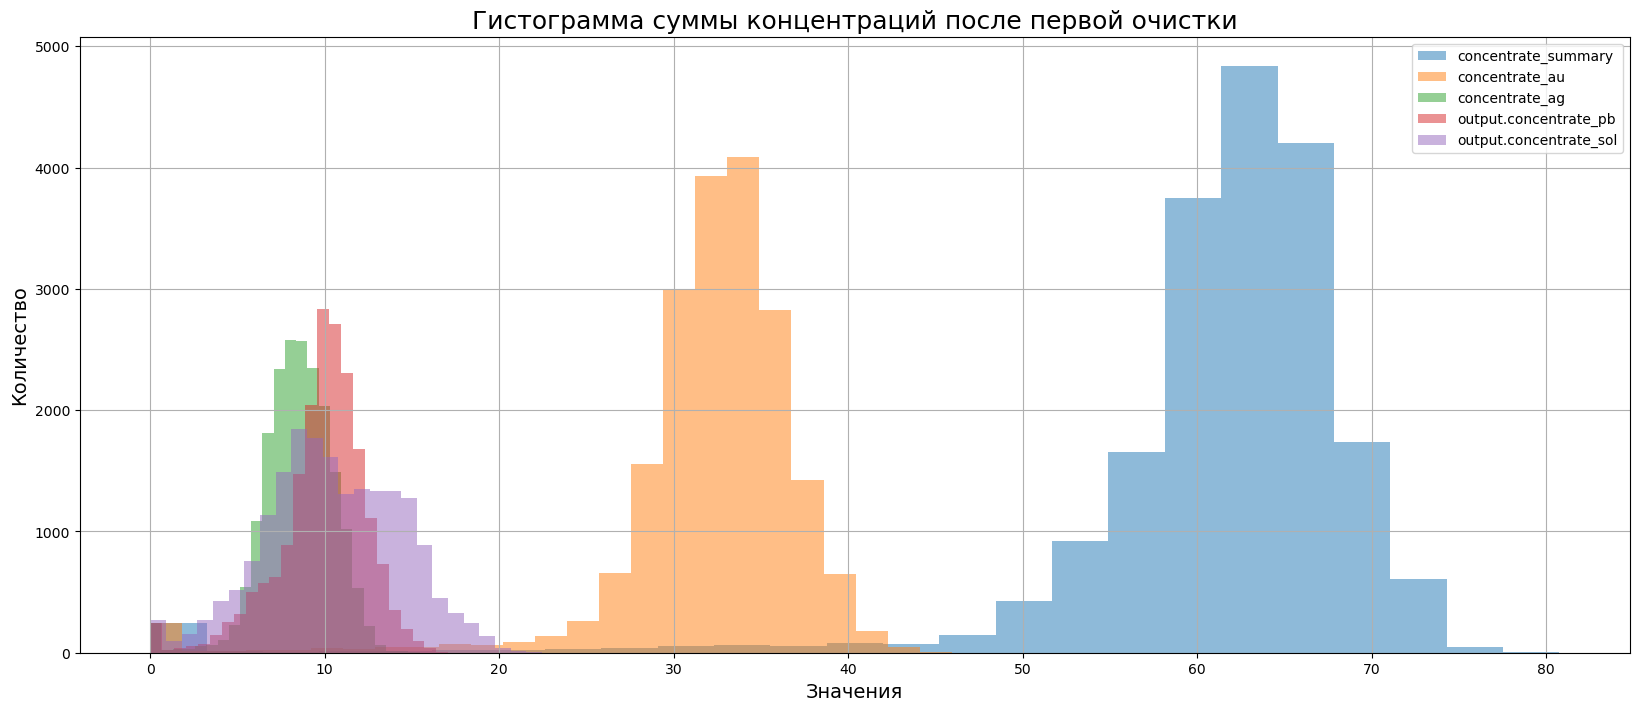

In [387]:
# Распределение суммы концентраций после первой очистки

plt.figure(figsize=(20,8))

data_full['primary_cleaner.output.concentrate_summary'].hist(bins=25, label='concentrate_summary', alpha=0.5)
data_full['primary_cleaner.output.concentrate_au'].hist(bins=25, label='concentrate_au', alpha=0.5)
data_full['primary_cleaner.output.concentrate_ag'].hist(bins=25, label='concentrate_ag', alpha=0.5)
data_full['primary_cleaner.output.concentrate_pb'].hist(bins=25, label='output.concentrate_pb', alpha=0.5)
data_full['primary_cleaner.output.concentrate_sol'].hist(bins=25, label='output.concentrate_sol', alpha=0.5)

plt.title('Гистограмма суммы концентраций после первой очистки', fontsize=18)
plt.legend()
plt.xlabel('Значения', fontsize=14)
plt.ylabel('Количество', fontsize=14)

plt.show()

In [388]:
# Сумма концентраций на выходе финальной очистки

data_full['final.output.concentrate_summary'] = (
    data_full['final.output.concentrate_au'] +
    data_full['final.output.concentrate_ag'] +
    data_full['final.output.concentrate_pb'] +
    data_full['final.output.concentrate_sol'])

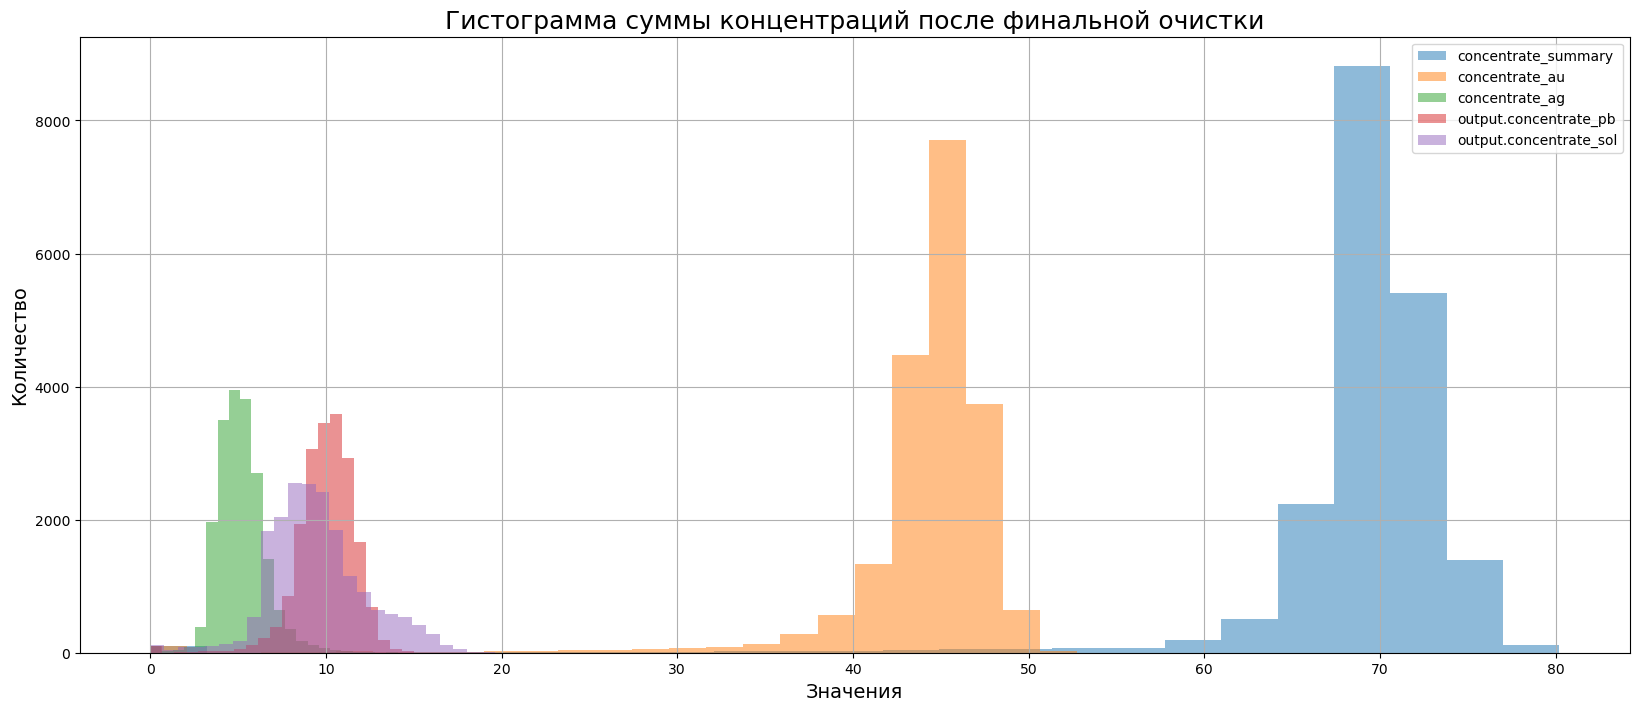

In [389]:
# Распределение суммы концентраций после финальной очистки

plt.figure(figsize=(20,8))

data_full['final.output.concentrate_summary'].hist(bins=25, label='concentrate_summary', alpha=0.5)
data_full['final.output.concentrate_au'].hist(bins=25, label='concentrate_au', alpha=0.5)
data_full['final.output.concentrate_ag'].hist(bins=25, label='concentrate_ag', alpha=0.5)
data_full['final.output.concentrate_pb'].hist(bins=25, label='output.concentrate_pb', alpha=0.5)
data_full['final.output.concentrate_sol'].hist(bins=25, label='output.concentrate_sol', alpha=0.5)

plt.title('Гистограмма суммы концентраций после финальной очистки', fontsize=18)
plt.legend()
plt.xlabel('Значения', fontsize=14)
plt.ylabel('Количество', fontsize=14)

plt.show()

На графиках заметны суммарные значения на каждом этапе. Необходимо их обработать

In [390]:
print(data_train[data_train['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count())
print(data_train[data_train['primary_cleaner.output.concentrate_ag'] < 1]['primary_cleaner.output.concentrate_ag'].count())
print(data_train[data_train['primary_cleaner.output.concentrate_pb'] < 1]['primary_cleaner.output.concentrate_pb'].count())
print(data_train[data_train['primary_cleaner.output.concentrate_sol'] < 1]['primary_cleaner.output.concentrate_sol'].count())

199
219
215
235


In [391]:
# Так как это аномалии, удаляем их

data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_au'] == 0].index)
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_ag'] == 0].index)
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_pb'] == 0].index)
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_sol'] == 0].index)
data_train[data_train['primary_cleaner.output.concentrate_au'] == 0].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,recovery


Удалили нулевые значения концентрации

## Модель

Модготовка данных для обучения моделей

Оставляем в features_train только признаки из data_test за исключением целевых

In [393]:
# список признаков для обучения модели
features_columns = list(data_test.columns)[1:-2]

# список целевых признаков
target_columns = ['rougher.output.recovery', 'final.output.recovery']

In [394]:
print(target_columns)
print('-'*25)
print(features_columns)

['rougher.output.recovery', 'final.output.recovery']
-------------------------
['primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatba

In [395]:
# Формируем выбоки для обучения 

train_features_rougher = no_nan.loc[:, data_test.columns]
train_target_rougher = no_nan['rougher.output.recovery']

train_features_final = train_features_rougher
train_target_final = no_nan['final.output.recovery']

test_features_rougher = no_nan.loc[:, data_test.columns]
test_target_rougher = no_nan['rougher.output.recovery']

test_features_final = test_features_rougher
test_target_final = no_nan['final.output.recovery']

In [396]:
# Применяем масштабирование к данным

scaler = StandardScaler()
scaler.fit(train_features_rougher)
train_features_rougher = scaler.transform(train_features_rougher)

### Функция рассчета sMAPE

In [397]:
# Рассчет sMAPE

def smape_func(target, pred):
    smape = abs(target - pred) / ((abs(target) + abs(pred)) / 2) * 100
#     smape = smape.fillna(value=0)

    smape = np.mean(smape)
    return smape

In [398]:
def total_smape_func(target_rougher, pred_rougher, target_final, pred_final):
#     Рассчет sMAPE для rougher
    smape_rougher = (abs(target_rougher - pred_rougher) /
                     ((abs(target_rougher) + abs(pred_rougher)) / 2) *
                     100).mean()
#     Рассчет sMAPE для final
    smape_final = (abs(target_final - pred_final) /
                   ((abs(target_final) + abs(pred_final)) / 2) * 100).mean()
#     Рассчет итогового sMAPE
    total_smape = (0.25 * smape_rougher) + (0.75 * smape_final)
    return total_smape

### LinearRegression

Ввиду того, что дальше будет использоваться GridSearchCV, и рассчет качества модели будет по sMAPE, следует задать параметр `greater_is_better=False`, поскольку по умолчанию скорер в GSCV считает по MSE (но это не точно)

In [399]:
smape_scorer = make_scorer(smape_func, greater_is_better=False)

In [400]:
model_linear_reg_rougher = LinearRegression()

Проверка модели кроссвалидацией

In [401]:
# Оценка модели с помощью кроссвалидации
scores_linear_reg_cv = cross_val_score(model_linear_reg_rougher,
                                       train_features_rougher,
                                       train_target_rougher,
                                       scoring=smape_scorer).mean()
smape_lr = abs(scores_linear_reg_cv)
print(f'Средняя оценка sMAPE: {round(smape_lr, 4)}')

Средняя оценка sMAPE: 7.1215


### DecisionTreeRegressor

In [402]:
model_dtr_rougher = DecisionTreeRegressor(random_state=state, max_depth=10)

Проверка модели кроссвалидацией

In [403]:
# Оценка модели с помощью кроссвалидации
scores_dtr_rougher = cross_val_score(model_dtr_rougher,  
                                          train_features_rougher, 
                                          train_target_rougher, 
                                          scoring = smape_scorer).mean()
smape_dtr = abs(scores_dtr_rougher)
print(f'Средняя оценка sMAPE: {round(smape_dtr, 4)}')

Средняя оценка sMAPE: 9.4993


### RandomForestRegressor

In [404]:
model_rfr_cv = RandomForestRegressor(random_state=state, max_depth=10)

Проверка модели кроссвалидацией

In [405]:
# Оценка модели с помощью кроссвалидации
scores_rfr_cv = cross_val_score(model_rfr_cv,
                                train_features_rougher,
                                train_target_rougher,
                                scoring=smape_scorer).mean()
smape_rfr = abs(scores_rfr_cv)
print(f'Средняя оценка sMAPE: {round(smape_rfr, 4)}')

Средняя оценка sMAPE: 6.4747


### Выбор модели

Лучшей моделью при проверке cross val score оказалась RandomForestRegressor. Для дальнейшего обучения и проверке на тестовой выборке выберем ее

Примечание: подбор параметров случайного леса здесь занимает около трех минут

In [406]:
# GridSearchCV + RandomForestRegressor для подбора параметров

param_grid = {'max_depth': range(2, 11, 4), 'n_estimators': range(50, 101, 25)}

model_rfr_gscv = RandomForestRegressor(random_state=state)

gscv_rfr = GridSearchCV(model_rfr_gscv, param_grid, cv=5, scoring=smape_scorer, n_jobs=-1)

# Отображение прогрессбара при подборе каждого параметра
for params in tqdm(gscv_rfr.param_grid):
    gscv_rfr.fit(train_features_rougher, train_target_rougher)
print('Обучено!')

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:25<00:00, 72.79s/it]

Обучено!


In [407]:
print(f'Лучшие параметры: {gscv_rfr.best_params_}')
print(f'sMAPE: {abs(round(gscv_rfr.best_score_, 4))}')

# Лучшие параметры:  {'max_depth': 6, 'n_estimators': 100}
# sMAPE: 6.2088

Лучшие параметры: {'max_depth': 6, 'n_estimators': 100}
sMAPE: 6.2088


Обучаем модель ранее выверенными лучшими параметрами

In [408]:
# Обучение модели и рассчет предсказаний

model_rfr= RandomForestRegressor(random_state=state, max_depth=6, n_estimators=100)

rfr_rougher = model_rfr.fit(train_features_rougher, train_target_rougher)
rfr_final = model_rfr.fit(train_features_final, train_target_final)

rfr_pred_rougher = rfr_rougher.predict(test_features_rougher)
rfr_pred_final = rfr_final.predict(test_features_final)

Рассчитываем sMAPE на тестовой выборке

In [409]:
# Рассчет sMAPE

smape_rougher = smape_func(test_target_rougher, rfr_pred_rougher) 
smape_final = smape_func(test_target_final, rfr_pred_final) 

In [410]:
total_smape = total_smape_func(test_target_rougher, rfr_pred_rougher,
                               test_target_final, rfr_pred_final)
print(f'Итоговая оценка модели sMAPE: {round(total_smape, 4)}')

Итоговая оценка модели sMAPE: 10.9609


Для проверки адекватности обучения модели, сравним ее с константной моделью DummyRegressor

In [411]:
model_dummy = DummyRegressor(strategy="median")

In [412]:
# Обучение подели и рассчет предсказаний

dummy_rougher = model_dummy.fit(train_features_rougher, train_target_rougher)
dummy_final = model_dummy.fit(train_features_final, train_target_final)

dummy_pred_rougher = dummy_rougher.predict(test_features_rougher)
dummy_pred_final = dummy_final.predict(test_features_final)

In [413]:
# Рассчет sMAPE

smape_dummy_rougher = smape_func(test_target_rougher, dummy_pred_rougher)
smape_dummy_final = smape_func(test_target_final, dummy_pred_final)

In [414]:
total_dummy_smape = total_smape_func(test_target_rougher, dummy_pred_rougher,
                                     test_target_final, dummy_pred_final)
print(f'Итоговая оценка модели sMAPE: {round(total_dummy_smape, 4)}')

Итоговая оценка модели sMAPE: 13.1324


In [415]:
if total_smape > total_dummy_smape:
    print('Модель недостаточно хороша')
else:
    print('Модель адекватна')

Модель адекватна


## Вывод

В рамках предобработки данных проекта, были изучены данные исходных файлов, были устранены пропуски, аномалии.  
В качестве проверки эффективности обогащения рассчитано значение `MAE` между данными и расчётными значениями эффективности.  
МАЕ близко к 0, что означает, что эффективность обогащения рассчитана верно.  
  
Анализ концентрации металлов показал, что концентрация золота увеличивается на каждом этапе обработки. Концентрация золота в отвалах так же увеличивается, но при этом на порядок ниже чем в сырье. На графиках распределения концентрации сырья видны значения равные нулю - то выбросы, и были устранены для дальнейших рассчетов  

Построены графики распределения плотности вероятности значений размеров гранул на разных этапах очистки выборок train и test.  
Рассчитана суммарная концентрация веществ на разных этапах.  

Обучены модели Линейной регрессии, Дерева решений и Случайного леса. Проведена оценка каждой модели методом `Cross_val_score`. Для дальнешего прогнозирования выбрана модель `Случайного леса` с параметрами `max_depth=6, n_estimators=100`.  

В качестве проверки обучения модели на адекватность сравнили полученные результаты с результатом на тестовой выборке константной модели 
`DummyRegressor, sMAPE = 13.1324`
При заданных параметрах на тестовой выборке выбранной моделью `RandomForestRegressor` 
удалось достичь показателя `sMAPE = 10.9609`. Модель признана адекватной

